# **Picturing Paws: Evaluating AI Art**

## **Introducing AWS Rekognition**

Amazon Web Services (AWS) has a service for computer vision purposes. It is a clouc based service that makes it easy to add image and video analysis to applications. It utilizes deep learning technology to automatically identify objects, people, text, scenes, and activities in images and videos. Rekognition also offers facial analysis and recognition capabilities, enabling applications to identify and compare faces for a variety of user verification, people counting, and public safety use cases. This service is designed to be highly scalable, providing fast and accurate analysis, and doesn't require machine learning expertise to use.

<br>

## **Introducing DALL-E**

OpenAI's [DALL-E 3](https://openai.com/dall-e-3) serves as a generative AI model that creates images from text prompts. Released natively into ChatGTP Plus and ChatGPT Enterprise, users are able to create images that are both unrestricted to a certain style and open to "tweaks" or further edits in order to align it more closely to the intended subject.

<br>

More specifically, DALL-E 3"is a 12-billion parameter version of GPT-3"...[therefore, like] GPT-3, DALL-E 3 is a transformer language model. It receives both the text and the image as a single stream of data containing up to 1280 tokens (any symbol from a discrete vocabulary), and is trained used maximum likelihood to generate all of the tokens, one after another. This training procedure allows DALL-E 3 to not only generate an image from scratch, but also to regenerate any rectangular region of an existing image that extends to the bottom-right corner, in a way that is consistent with the text prompt".


<br>

### **Other Cool Capabilities of Generative AI**

Extending even beyond still images, a team of publically famous digital animators on YouTube-- Corridor Crew, even managed to transform a live action short film into its equivalant animated doppleganger by asking AI to reconstruct their shots into a more illustrated, comic-esque style. And using this method they managed to produce a full-length short film! Showcasing the potential for Generative AI in creative works.

<br>


**Corridor Crew Process**: [Did We Just Change Animation Forever?](https://www.youtube.com/watch?v=_9LX9HSQkWo&ab_channel=CorridorCrew)

**Corridor Crew Short Film** [Video Link](https://www.youtube.com/watch?v=GVT3WUa-48Y)


<br>

### **Ethical Concerns**

However, Generative AI-- in particular AI generated images, has unintentionally served as an accomplice to copyright infringement cybercrime.

<br>


Generative AI however is associated with concerns revolving [copyright infringement](https://www.copyright.gov/help/faq/faq-definitions.html#:~:text=As%20a%20general%20matter%2C%20copyright,permission%20of%20the%20copyright%20owner.)-- or when a copyrighted work is used without the permission of the respective owner or artist in question. Certain artists for instance have had their work unknowingly entered into databases without consent and in many cases been left without the option to opt out of such practices.

<br>

In addition to this, the FBI, in an [article](https://timesofindia.indiatimes.com/gadgets-news/scammers-using-ai-to-make-sexually-explicit-content-extort-victims-fbi/articleshow/100856184.cms) releasd earlier this year, has stated that they have "recieved an increasing number of reports of 'sextortion', a type of extortion tactic wherein criminals trick a victim into providing financial beneifts by threreatening to reveal an explicit or secually-themed photo"...cybercriminals [are reportedly finding] images of a victim on social media and then [editing] them using AI to make them look realistic and sexually-explicit." Thus prompting a newfound concern and need for the general public to exercise caution when posting personal photos online.

<br>


### **Purpose**

Taking motivation from these listed issues, we wanted to evaluate DALLE-3's ability to create realistic images by using AWS Rekognition to distinguish between real and AI-generated images.


<br>


### **Hypothesis**

1. Real images will have higher confidence scores when detecting objects with label detection than the DALL-E 3 generated AI images.

2. A higher word count in DALL-E 3 prompt when creating an image for analysis will translate into a high confidence interval score.

We will try to answer these hypothesis with out results from the data analsyis on the confidence interval data we get.

## **Architecture Overview**
<img src='https://drive.google.com/uc?export=view&id=1BcSrP9fF6YBbNVELn22RsAnbyeTBJTWr' width='2000px'>



First we used Dog API to generate 15 random and realistic images of different dog breeds. Next, we used prompt engineering in DALL-E 3 to generate mimicked versions of the Dog API images by specifying variable such as breed, mood/expression, action, etc and then included a tweak to generate 15 more precise photos. We then sent these images to their respective S3 buckets within the AWS cloud. We ran those buckets through Sagemaker to do a model analysis in rekognition which generated confidence scores between the real and AI images.

## **WorkFlow Steps**

Refer to the repository:
###**Step 1:** Generate 15 images using [Dog API](https://dog.ceo/dog-api/):
#####Fetch random, realistic, different dog breed images

This is what the Dog API image will look like:

<img src='https://drive.google.com/uc?export=view&id=1LtrtradSHoSx_76_iRDCBOGp4dZGBJnE' width='250px'>



###**Step 2**: Reproduce/Mimic Dog API images with prompt engineering DALL-E 3
<br>

##### Create text prompts based on the Dog API images to create AI generated images using variable such as breed, color, directionality, actions, mood, etc. (Essentially user describing what you percieve the image to be as)
<br>

###### **Example prompt** (15 images): Create an image of a groenendael dog. The dog is black. The pov that the picture of the dog is in is facing the dogs right side. The dogs hair should be short.  The dog should have its tongue sticking out just a bit. The dog is standing on a rock with a body of water and sand in the background. The dog is in full frame of the photo. The background is blurry. There is normal lighting.


Then generate 15 more images, but with a tweak for better specificity as listed below

<br>

###### **Tweak:** The dog's body should be in full frame and is sitting on top of the rock. The background is good.
#####*This is what a generated tweaked image would look like:*
<img src='https://drive.google.com/uc?export=view&id=1G9jcM9wUsdbREGqOJbeG0b2rvK1YK19m' width='250px'>

**Quality:**

The quality of the Dog API images can vary depending on the source of the API. It iss regularly updated to include new images of dog breeds. Ensuring that users have access to the latest and relevant content.

The DALL-E 3 images were fairly similar in terms of resolution and quality, however adhereing to what exactly was outlined in the prompts varied, some were addressed and others needed to be repeated in the tweak.

<br>

###**Step 3:** Create two respective S3 buckets for the Dog API images and prompt engineered images
<br>

1.   Using AWS open the S3 dashboard and create two separate buckets (for dog API & DALL-E 3 respectively)
2.   Upload the respective images, either by dragging and dropping or using the upload feature, for each into their buckets

<br>

###**Step 4:** Sagemaker + Rekognition

We used this code in Sagemaker for each image in the bucket:


In [ ]:
#import boto3

#client=boto3.client('rekognition')
#response = client.detect_labels(Image={'S3Object':{'Bucket':"ai-pictures-collection",'Name':"Aussie.jpg"}}, MaxLabels=10)
#response['Labels']


The lack of permission in creating IAM prevented us from doing this as a batch process in Lambda, so it has to be done manually.

Essentially the code uses Rekognition to analyze the image in the S3 bucket, and detect labels. The labels are then produced with a confidence score indicating the likelihood the label represents an object or concept in the image. Examples of labels identified are specific dog breeds, nature, and background decor/objects.

Additionally, Working with dogs did pose problems for us as students, as to create custom labeling, we needed further IAM permissions that we were not able to accses so we stuck with the confidence intervals that were already within Rekognition and compared thsoe with each other.  

## **Data Analysis**



In [ ]:
url = 'https://raw.githubusercontent.com/vaponso/QTM350FinalProject/main/QTM350Project.csv'
df = pd.read_csv(url)

#### Creating Datasets for Boxplots

Lots of repetitive code here, but essentially we needed to gather the appropriate datasets for each relevant label from Rekognition

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df_AI = df[df["ImageName"].str.contains("DALLE")]

df_AI1 = df_AI[df["ImageName"].str.contains("1")]
df_AI2 = df_AI[df["ImageName"].str.contains("2")]
df_Real = df[~(df["ImageName"].str.contains("DALLE"))]

# Only "Animal" Label
df_AI1_Animal = df_AI1["Animal"].dropna(axis=0)
df_AI2_Animal = df_AI2["Animal"].dropna(axis=0)
df_Real_Animal = df_Real["Animal"].dropna(axis=0)

# Only "Canine" Label
df_AI1_Canine = df_AI1["Canine"].dropna(axis=0)
df_AI2_Canine = df_AI2["Canine"].dropna(axis=0)
df_Real_Canine = df_Real["Canine"].dropna(axis=0)

# Only "Dog" Label
df_AI1_Dog = df_AI1["Dog"].dropna(axis=0)
df_AI2_Dog = df_AI2["Dog"].dropna(axis=0)
df_Real_Dog = df_Real["Dog"].dropna(axis=0)
dataDogLabel = [df_AI1_Dog, df_AI2_Dog, df_Real_Dog]

# Only "Mammal" Label
df_AI1_Mammal = df_AI1["Mammal"].dropna(axis=0)
df_AI2_Mammal = df_AI2["Mammal"].dropna(axis=0)
df_Real_Mammal = df_Real["Mammal"].dropna(axis=0)

# Only "Pet" Label
df_AI1_Pet = df_AI1["Pet"].dropna(axis=0)
df_AI2_Pet = df_AI2["Pet"].dropna(axis=0)
df_Real_Pet = df_Real["Pet"].dropna(axis=0)

dataAnimalLabel = [df_Real_Animal, df_AI1_Animal, df_AI2_Animal]
allData1 = [df_Real_Animal, df_AI1_Animal, df_AI2_Animal, df_Real_Dog, df_AI1_Dog, df_AI2_Dog, df_Real_Pet, df_AI1_Pet, df_AI2_Pet]
allData2 = [df_Real_Canine, df_AI1_Canine, df_AI2_Canine, df_Real_Mammal, df_AI1_Mammal, df_AI2_Mammal]

<ipython-input-13-6f2ed68228f2>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_AI1 = df_AI[df["ImageName"].str.contains("1")]
<ipython-input-13-6f2ed68228f2>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_AI2 = df_AI[df["ImageName"].str.contains("2")]


### **Analysing "Animal", "Dog", and "Pet" Label Confidence Scores**

From each set of 3 box plots shown, the first one represents the 1st image DALL-E 3 gives us. The second box plot is the tweaked DALL-E 3 image. The third box plot is the real image. Each plot works with n=15 images. Overall while these plots aren't statistically signifigant, we can see that there is a trend for the first box plot to be more in line with higher confidence intervals for what Rekognition will recognize.

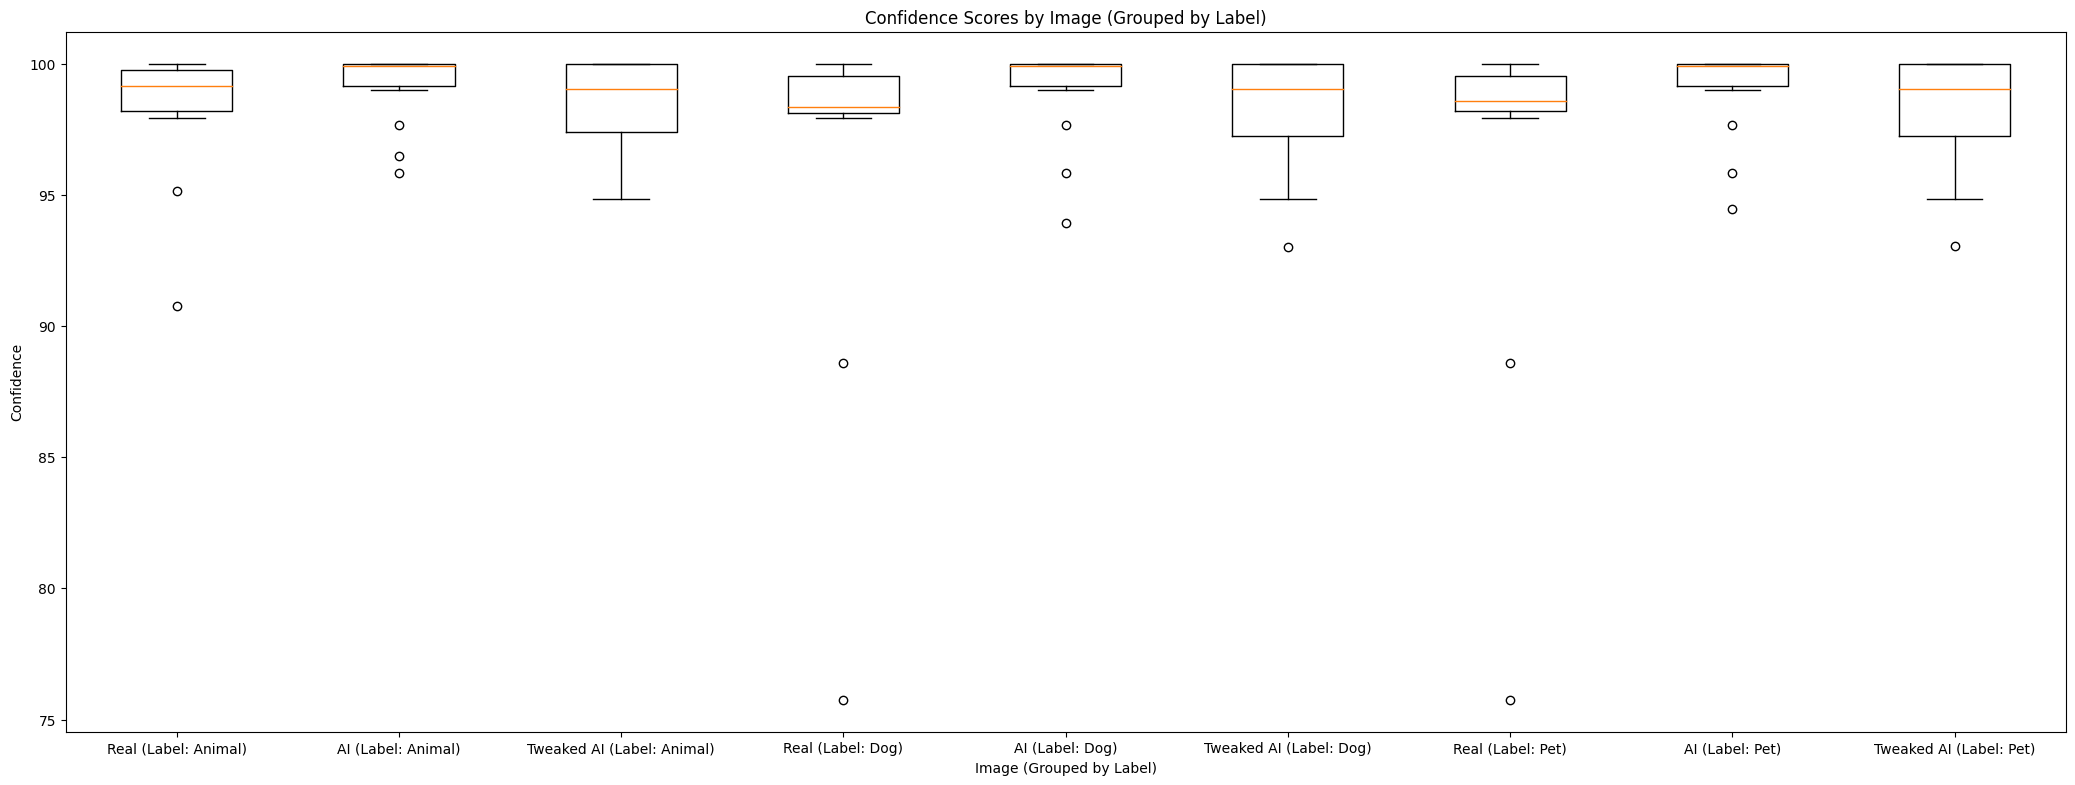

In [ ]:
fig = plt.figure(figsize = (20,7))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(allData1)
dallelabels1 = ['Real (Label: Animal)', 'AI (Label: Animal)', 'Tweaked AI (Label: Animal)',
                'Real (Label: Dog)', 'AI (Label: Dog)', 'Tweaked AI (Label: Dog)',
                'Real (Label: Pet)', 'AI (Label: Pet)', 'Tweaked AI (Label: Pet)']
plt.xticks(range(1, len(dallelabels1) + 1), dallelabels1)
plt.xlabel('Image (Grouped by Label)')
plt.ylabel('Confidence')
plt.title('Confidence Scores by Image (Grouped by Label)')
plt.show()

### **Analysing "Canine" and "Mammal" Label Confidence Scores**

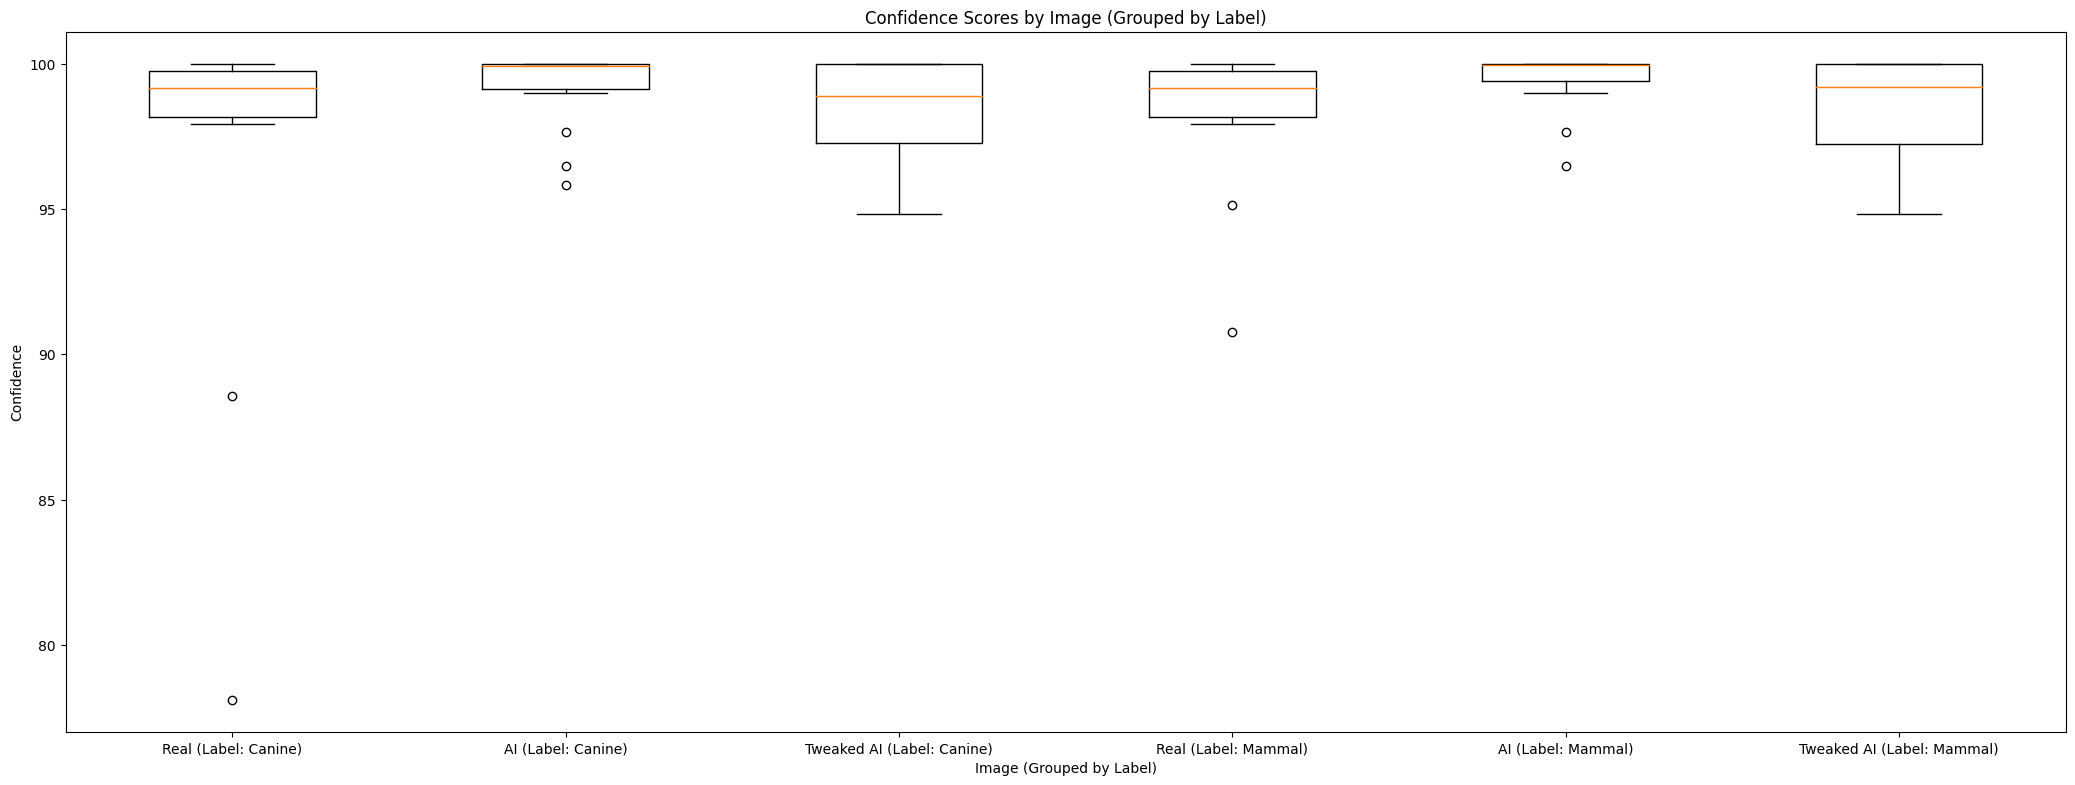

In [ ]:
fig = plt.figure(figsize = (20,7))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(allData2)
dallelabels2 = ['Real (Label: Canine)', 'AI (Label: Canine)', 'Tweaked AI (Label: Canine)',
                'Real (Label: Mammal)', 'AI (Label: Mammal)', 'Tweaked AI (Label: Mammal)']
plt.xticks(range(1, len(dallelabels2) + 1), dallelabels2)
plt.xlabel('Image (Grouped by Label)')
plt.ylabel('Confidence')
plt.title('Confidence Scores by Image (Grouped by Label)')
plt.show()

There is obviously more variation in the real images than the AI generated images. One possibility of this is by giving DALL-E 3 specifically worded commands to prompt an image generation so that it is makes it look very clear and specific. Real photos on the other hand, while us as humans may be able to see and recognize that the animal is clearly a dog, Rekognition may have more trouble with not as clear or pixilated pictures.

Another interesting observation is that there is more variation provided by the bar lower range of the tweaked labels accross the board. There are definitly more outliers with the real images that suggest that Rekognition had a harder time placing labels onto the real images.

We can also see that there are less outliers in the weaked photos. This indeicates that the tweaking of the initial DALL-E 3 image was a good thing, as it was able to make these labels with higher confidence intervals.

### **Scatterplot of Final AI Image Score vs Total Word Count**

We will only be focusing on the "Dog" Label as it is the most interesting and relevant label for the images, both real and artificial, that we have generated. We are interested in testing our second hypothesis: whether increasing the word count of our prompts will increase or decrease the confidence scores obtained from AWS Rekognition.

We first manipulated our dataset to fit our needs:

In [ ]:
url = 'https://raw.githubusercontent.com/vaponso/QTM350FinalProject/main/DALLEPrompts.csv'
df_reg = pd.read_csv(url)

In [ ]:
df_reg["wordcount1"] = [len(string.split()) for string in df_reg["Prompt1"]]
df_reg["wordcount2"] = [len(string.split()) for string in df_reg["Prompt2"]]

df_Real = df_Real.reset_index()
df_AI1 = df_AI1.reset_index()
df_AI2 = df_AI2.reset_index()

for i in range(len(df_reg)):
  x = df_reg.loc[i, "wordcount1"]
  y = df_reg.loc[i, "wordcount2"]
  df_reg.loc[i, "wordcounttotal"] = x + y

  df_reg.loc[i, "realscore"] = df_Real.loc[i, "Dog"]
  df_reg.loc[i, "ai1_score"] = df_AI1.loc[i, "Dog"]
  df_reg.loc[i, "ai2_score"] = df_AI2.loc[i, "Dog"]

  x2 = df_Real.loc[i, "Dog"]
  y2 = df_AI1.loc[i, "Dog"]
  z2 = df_AI2.loc[i, "Dog"]
  df_reg.loc[i, "ai1_vs_real"] = x2 - y2
  df_reg.loc[i, "ai2_vs_real"] = x2 - z2
  df_reg.loc[i, "ai1_vs_ai2"] = z2 - y2

We then regressed the confidence scores of the second AI image (representing the "final" AI image) on the total word count of both prompts to DALL-E:

Text(0.5, 1.0, 'Confidence Scores vs. Total Word Count of Both Prompts')

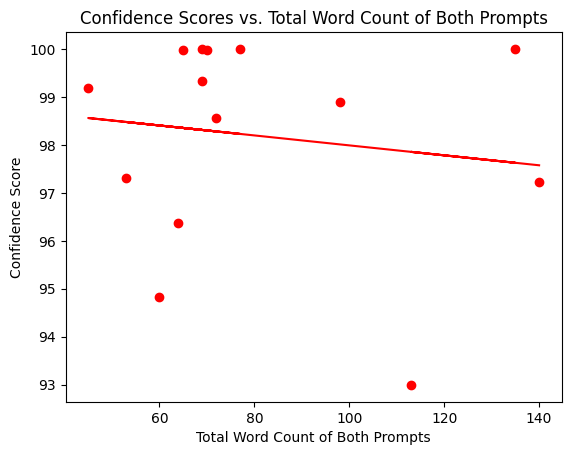

In [ ]:
import statsmodels.formula.api as smf

fitf = smf.ols('ai2_score ~ wordcounttotal', data=df_reg).fit()
linef = fitf.params.wordcounttotal*df_reg["wordcounttotal"] + fitf.params.Intercept
plt.scatter(df_reg["wordcounttotal"], df_reg["ai2_score"], color='red', label='Set 1', marker='o')
plt.plot(df_reg["wordcounttotal"], linef, label='Best-Fit Line', color='red')
plt.xlabel('Total Word Count of Both Prompts')
plt.ylabel('Confidence Score')
plt.title('Confidence Scores vs. Total Word Count of Both Prompts')

From this it seems that the higher the word count is for the initial prompt on DALL-E 3, the smaller the confidence in AWS Rekognition's labeling ability. While there are outliers present, the ones that are there seem to have less accuracy. There could be confounding variables here, however, such as difference in the prompting of DALL-E due to differences in writing preference. Nonetheless, this is an interesting finding as it shows that writing more when prompting DALL-E may not always be ideal, at least based on AWS Rekognition's standards.

### **Did "Tweaking" the first AI-generated image make a difference?**

Now that we've analyzed our main hypotheses, we wanted to know: did the second prompt, the "tweak", actually improve the AI images confidence score in AWS Rekognition? Did it vary according to word count? We examined this by regressing the difference between the 2nd AI image and 1st AI image's confidence scores, and then regressed these differences by the word count of the "tweak".

Text(0.5, 1.0, 'Difference Between 2nd and 1st Images vs. Word Count of 2nd Prompt')

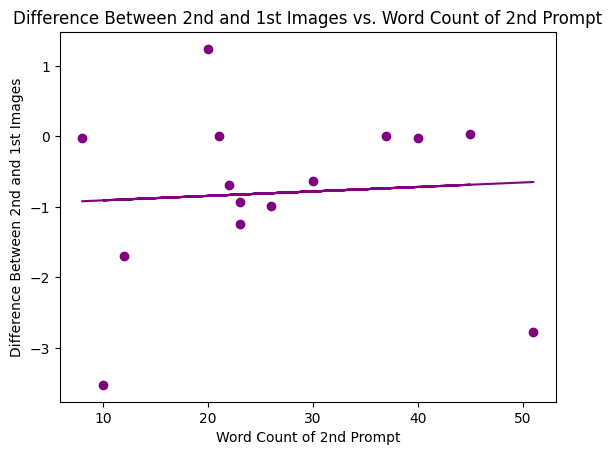

In [ ]:
'''
fit1 = smf.ols('ai2_score ~ wordcount2', data=df_reg).fit()
line1 = fit1.params.wordcount2*df_reg["wordcount2"] + fit1.params.Intercept
fit2 = smf.ols('ai2_vs_real ~ wordcount2', data=df_reg).fit()
line2 = fit2.params.wordcount2*df_reg["wordcount2"] + fit2.params.Intercept
'''
fit3 = smf.ols('ai1_vs_ai2 ~ wordcount2', data=df_reg).fit()
line3 = fit3.params.wordcount2*df_reg["wordcount2"] + fit3.params.Intercept
#plt.scatter(df_reg["wordcount2"], df_reg["ai2_score"], color='red', label='TweakedScore vs. 2ndPrompt', marker='o')
#plt.scatter(df_reg["wordcount2"], df_reg["ai2_vs_real"], color='blue', label='Difference between Real vs. 2ndPrompt', marker='o')
plt.scatter(df_reg["wordcount2"], df_reg["ai1_vs_ai2"], color='purple', label='OLS Best Fit', marker='o')


#plt.plot(df_reg["wordcount2"], line1, label='Best-Fit Line', color='red')
#plt.plot(df_reg["wordcount2"], line2, label='Best-Fit Line', color='blue')
plt.plot(df_reg["wordcount2"], line3, label='Best-Fit Line', color='purple')
plt.xlabel('Word Count of 2nd Prompt')
plt.ylabel('Difference Between 2nd and 1st Images')
plt.title('Difference Between 2nd and 1st Images vs. Word Count of 2nd Prompt')

#Conclusion

In conclusion we can see that there are many factors when choosing how Rekognition and DALL-E 3 work together. We can see that Rekognition overall will give images created by DALL-E 3 higher confidence intervals. We can also see that adjustment made from prompts kead to some interesting results in AWS Rekognition, namely that Rekognition doesn't quite like the adjusted images as much as the first AI image. This can be slightly countered by increasing the number of words for the "tweak," which is also interesting since we observed that more words for the initial prompt actually decreased the confidence score in Rekognition. These could be worth further examining. Overall, this was a fun project of combining both an AWS ML API as well as another incredibly powerful and relevant AI tool, DALL-E. AI and ML will continue to grow in the coming years, and understanding how they work will prove incredibly useful both present and future.